In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier


In [19]:
url="https://raw.githubusercontent.com/jbrownlee/Datasets/master/pima-indians-diabetes.data.csv"

In [20]:
columns=['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','IBM','DiabetesPedigreeFunction','Age','Outcome']

In [21]:
columns

['Pregnancies',
 'Glucose',
 'BloodPressure',
 'SkinThickness',
 'Insulin',
 'IBM',
 'DiabetesPedigreeFunction',
 'Age',
 'Outcome']

In [28]:
df=pd.read_csv(url,names=columns)
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,IBM,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


In [32]:
#step 2 features and targets
X=df.drop('Outcome',axis=1)
y=df['Outcome']

In [33]:
#step 3 train test split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
#train decision tree
dt_clf=DecisionTreeClassifier(criterion='entropy',max_depth=3,random_state=42)
dt_clf.fit(X_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=42)

In [36]:
#train random forest
rf_clf = RandomForestClassifier(n_estimators =100, random_state = 42)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [38]:
#step 6 compare accuracy
print("Decision Tree - Training Accuracy:", dt_clf.score(X_train,y_train))
print("Decision Tree - Testing Accuracy:", dt_clf.score(X_test,y_test))
print("Random Forest - Training Accuracy:", rf_clf.score(X_train,y_train))
print("Random Forest - Testing Accuracy:", rf_clf.score(X_test,y_test))

Decision Tree - Training Accuracy: 0.7752442996742671
Decision Tree - Testing Accuracy: 0.7662337662337663
Random Forest - Training Accuracy: 1.0
Random Forest - Testing Accuracy: 0.7207792207792207


In [41]:
#step 7 feature importance from random forest
feature_imp=pd.Series(rf_clf.feature_importances_,index=X.columns).sort_values(ascending=False)
feature_imp

Glucose                     0.258864
IBM                         0.169984
Age                         0.140931
DiabetesPedigreeFunction    0.123768
BloodPressure               0.088134
Pregnancies                 0.076551
Insulin                     0.076122
SkinThickness               0.065646
dtype: float64

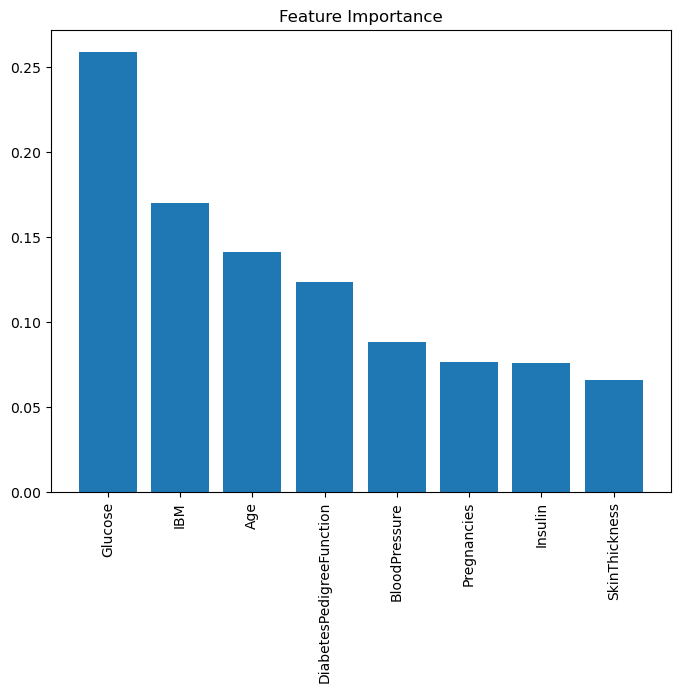

In [42]:
#plot feature importance
plt.figure(figsize=(8,6))
plt.title('Feature Importance')
plt.bar(feature_imp.index,feature_imp.values)
plt.xticks(rotation=90)
plt.show()